In [8]:
import pandas as pd
from pyarrow import fs
import fsspec

# lakeFS credentials from your docker-compose.yml
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"

# lakeFS endpoint (running locally)
lakefs_endpoint = "http://lakefs-dev:8000/"

# lakeFS repository, branch, and file path
repo = "weather"
branch = "main"
path = "weather.parquet"

# Construct the full lakeFS S3-compatible path
lakefs_s3_path = f"s3a://{repo}/{branch}/{path}"

# Configure storage_options for lakeFS (S3-compatible)
storage_options = {
    "key": ACCESS_KEY,
    "secret": SECRET_KEY,
    "client_kwargs": {
        "endpoint_url": lakefs_endpoint
    }
}

# path_all_partition is the full path to the partitioned data
full_file_path = 's3a://weather/main/weather.parquet/year=2025/month=5/day=8/hour=6/dd1741ec35434825a62561e9625ed3e8-0.parquet'

# Use fsspec to create the filesystem
fs = fsspec.filesystem("s3", **storage_options)

# Check if the file exists using the filesystem
def check_file_exists(file_path):
    try:
        if fs.exists(file_path):
            print(f"File found: {file_path}")
            return True
        else:
            print(f"File not found: {file_path}")
            return False
    except Exception as e:
        print(f"Error checking file: {e}")
        return False

# If file exists, read the data
if check_file_exists(full_file_path):
    df2 = pd.read_parquet(
        full_file_path,
        engine='pyarrow',  # Specify engine if necessary
        storage_options=storage_options,
        filesystem=fs  # Pass the filesystem to pandas
    )
    print(df2.info())
    print(df2.head())
else:
    print("Unable to read the file because it does not exist.")

File not found: s3a://weather/main/weather.parquet/year=2025/month=5/day=8/hour=6/dd1741ec35434825a62561e9625ed3e8-0.parquet
Unable to read the file because it does not exist.


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'minute'}>],
       [<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'main.temp'}>]], dtype=object)

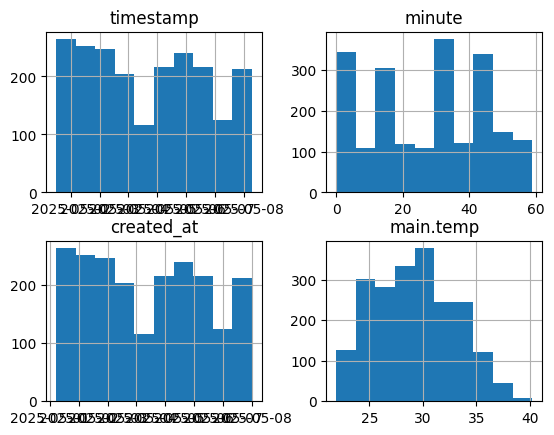

In [2]:
df2.hist()